In [1]:
import numpy 
import pandas as pd
import numpy as np
import re

from statsmodels.tsa.seasonal import seasonal_decompose

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

## Load & Preprocessing

* big_news.csv 전처리

In [2]:
path = '../Data/Raw/big_news.csv'

df_origin = pd.read_csv(path)
df_origin['date'] = pd.to_datetime(df_origin['date'])
# df_origin.set_index(['date'], inplace= True)
df_origin['keywords'] = df_origin['keywords'].apply(lambda x : eval(x))
df_origin['numKeywords'] = df_origin['keywords'].apply(lambda x : len(x))
# text가 null인 news 제외
numTextNull = sum(df_origin['text'].isnull())
print(f'뉴스 내용이 Null인 데이터 수:{numTextNull}, 비율: {round(numTextNull / len(df_origin) * 100, 2)}')
df_origin = df_origin[df_origin['text'].notnull()]
df_origin['news_id'] = df_origin['href'].apply(lambda x : int(x.split('news_id=')[1]))
print(f'news_id가 중복인 데이터 수: {len(df_origin) - df_origin["news_id"].nunique()}')
df_origin = df_origin.drop_duplicates(['news_id'])
# df_origin.to_csv('../Data/Preprocessed/조경뉴스.csv', index= False)

뉴스 내용이 Null인 데이터 수:178, 비율: 0.5
news_id가 중복인 데이터 수: 1


## 여기에 개괄분석 내용 작성 필요

In [17]:
result_list = []

for i in tqdm(df_origin['keywords'].values.tolist()):
    result_list = result_list + i

  0%|          | 0/35127 [00:00<?, ?it/s]

100%|██████████| 35127/35127 [00:20<00:00, 1678.24it/s]


In [29]:
count_keyword = {}

for keyword in tqdm(set(result_list)):
    count_keyword[keyword] = [result_list.count(keyword)]

  0%|          | 0/38627 [00:00<?, ?it/s]

100%|██████████| 38627/38627 [01:26<00:00, 448.19it/s]


In [32]:
countKeywordsDf = pd.DataFrame(count_keyword).T
countKeywordsDf.columns = ['count']

In [42]:
countKeywordsDf.sort_values(by = ['count'], ascending = False).iloc[:100]

,count
서울시,1681
정원,1194
산림청,1006
국토교통부,916
조경,825
...,...
조경수,98
생태공원,97
서울정원박람회,96
국립공원관리공단,95


In [6]:
df_origin['type'] = df_origin['keywords'].apply(lambda x : type(x))


In [7]:
df_origin['type'].unique()

array([<class 'list'>], dtype=object)

In [ ]:
tmp = keywordsDf.copy()
tmp.index = df_origin.index

tmp_df = pd.concat([df_origin, tmp], axis = 1)

In [76]:
df_origin.head(2)

,title,sub-title,publisher,author,text,keywords,href
date,,,,,,,
2019-04-19,"[캠퍼스] 한국전통문화대 전통조경학과, 고택정원 7곳 평면도 작성 실시",고택정원의 과거와 현재의 차이점 연구,라펜트,김태원,한국전통문화대학교 전통조경학과 2학년 학생들이 이재용 교수의 ‘전통식재론’ 수업의 ...,"[한국전통문화대학교, 이재용 교수, 전통조경, 3D 활용, 조경학과]",https://www.lafent.com/inews/news_view.html?ne...
2022-11-07,2022년 올해의 정원식물은?,‘2022 대한민국 정원식물 전시·품평회’ 성료,라펜트,전지은,‘2022 대한민국 정원식물 전시·품평회’를 9월 30일부터 10월 30일까지 개...,"[한국수목원정원관리원, 대한민국 정원식물 전시·품평회, 정원식물]",https://www.lafent.com/inews/news_view.html?ne...


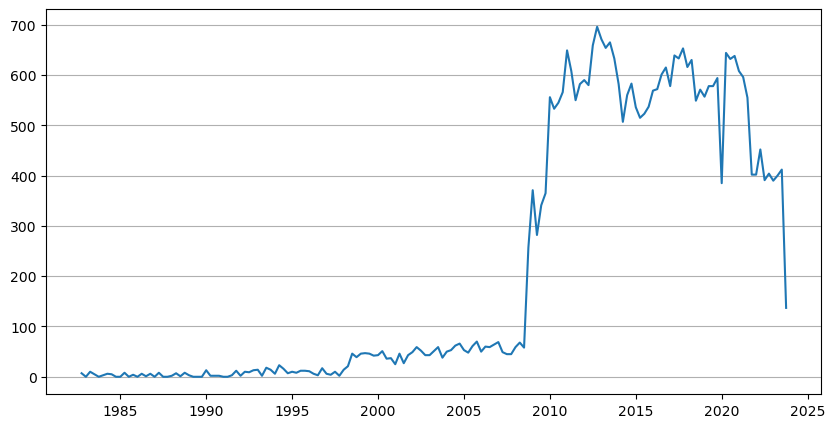

In [77]:
fig, ax = plt.subplots(figsize= (10, 5))

ax.plot(df_origin.resample('Q')['title'].count())
ax.grid(axis= 'y')

3.46


(array([4462., 1805., 4425., 7291., 6630., 4725., 3499., 1640.,  643.,
         161.,   24.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 11 artists>)

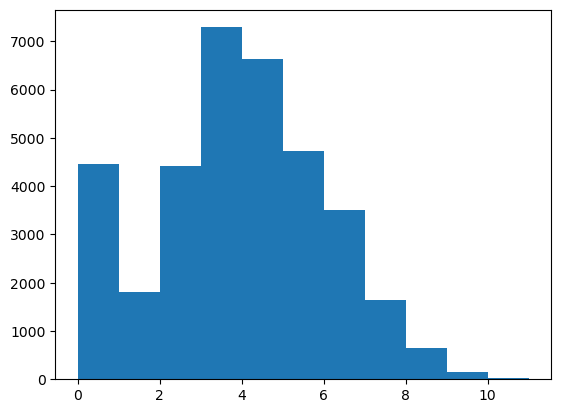

In [83]:
# 평균 keyword 사용 갯수 : 전체 게시글
print(round(df_origin['numKeywords'].mean(), 2))

plt.hist(df_origin['numKeywords'], 
         bins= df_origin['numKeywords'].max())

In [69]:
df_origin = df_origin.loc['2010':]

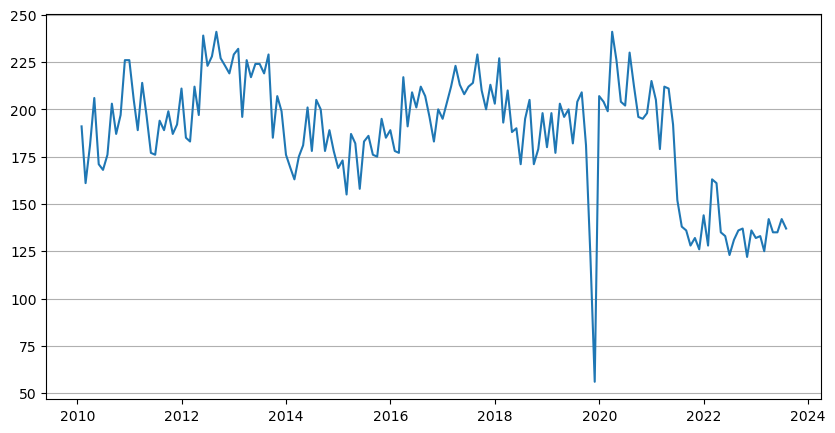

In [70]:
fig, ax = plt.subplots(figsize= (10, 5))

ax.plot(df_origin.resample('M')['title'].count())
ax.grid(axis= 'y')

In [71]:
result = seasonal_decompose(df_origin.resample('M')['title'].count(), model = 'additive')

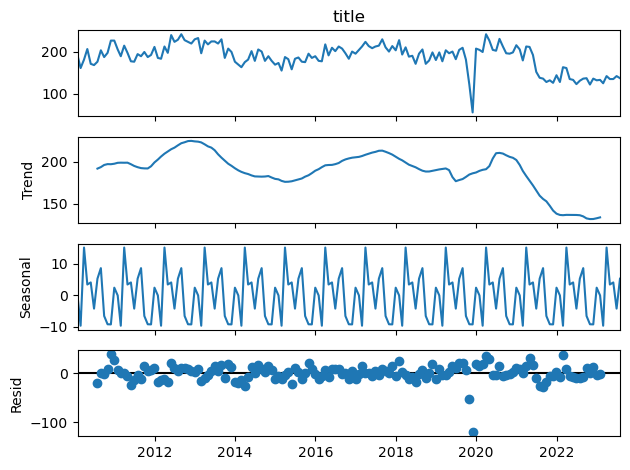

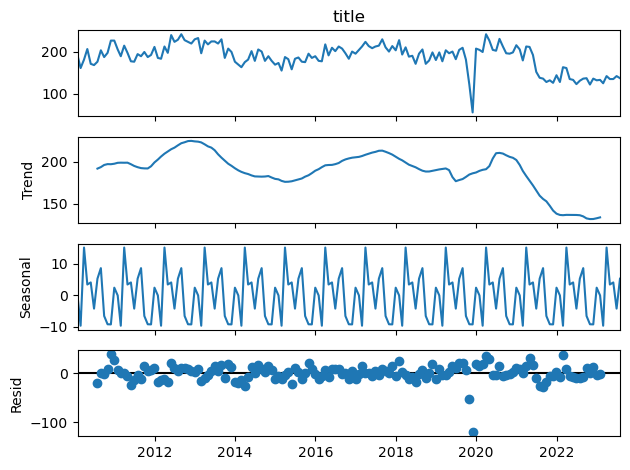

In [73]:
result.plot()